
Experiment 3b - 4


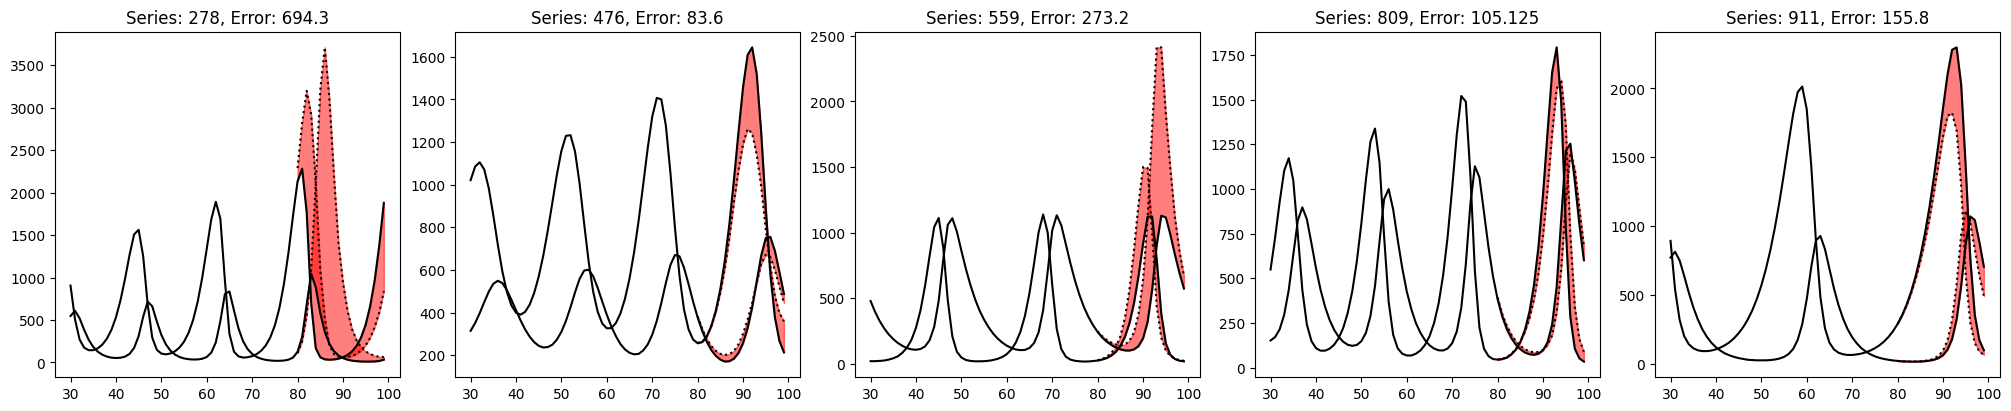


Experiment 3b - 3


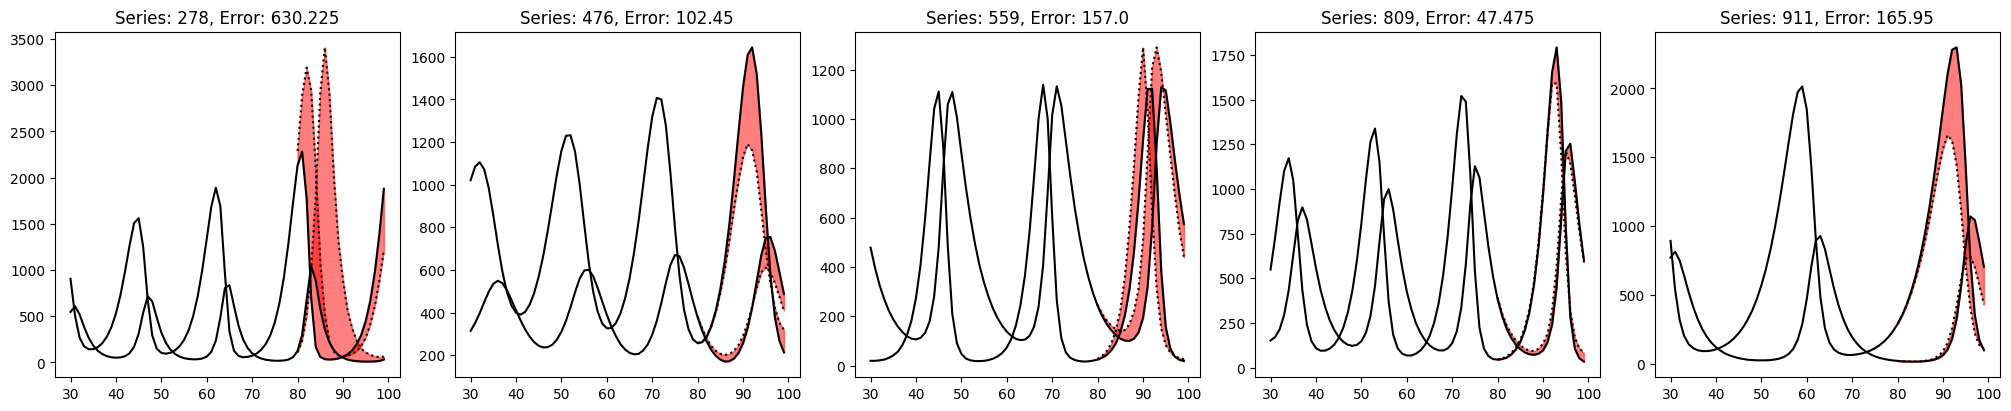


Experiment 3b - 1


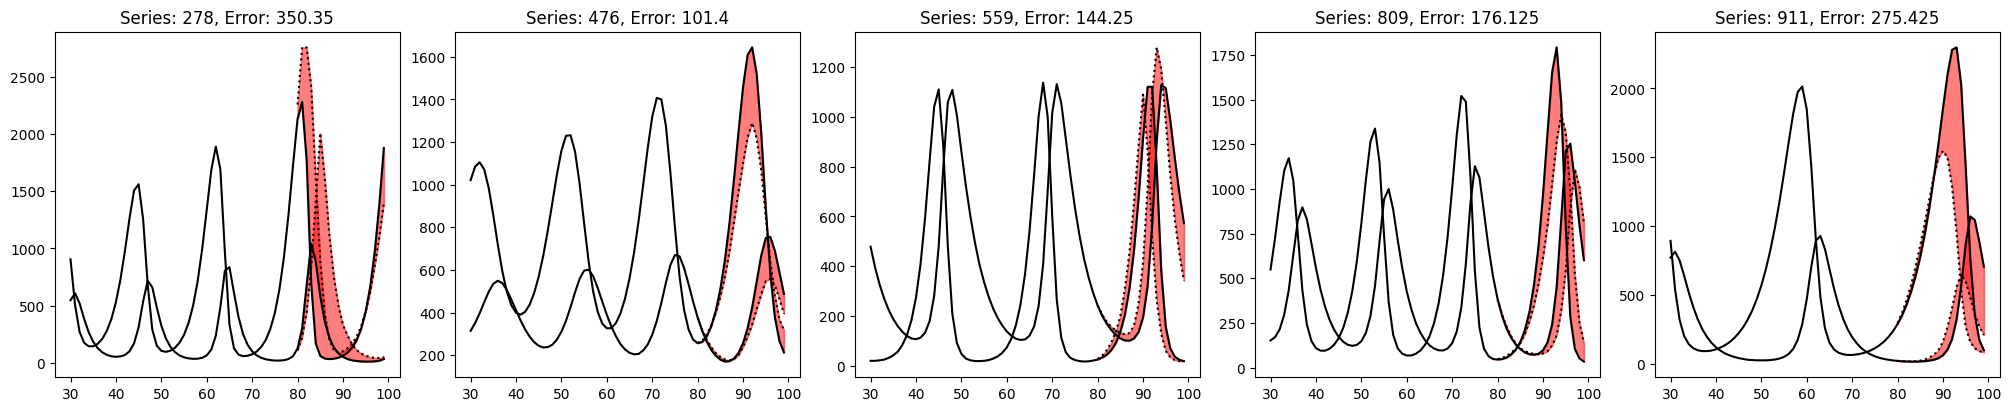


Experiment 3b - 5


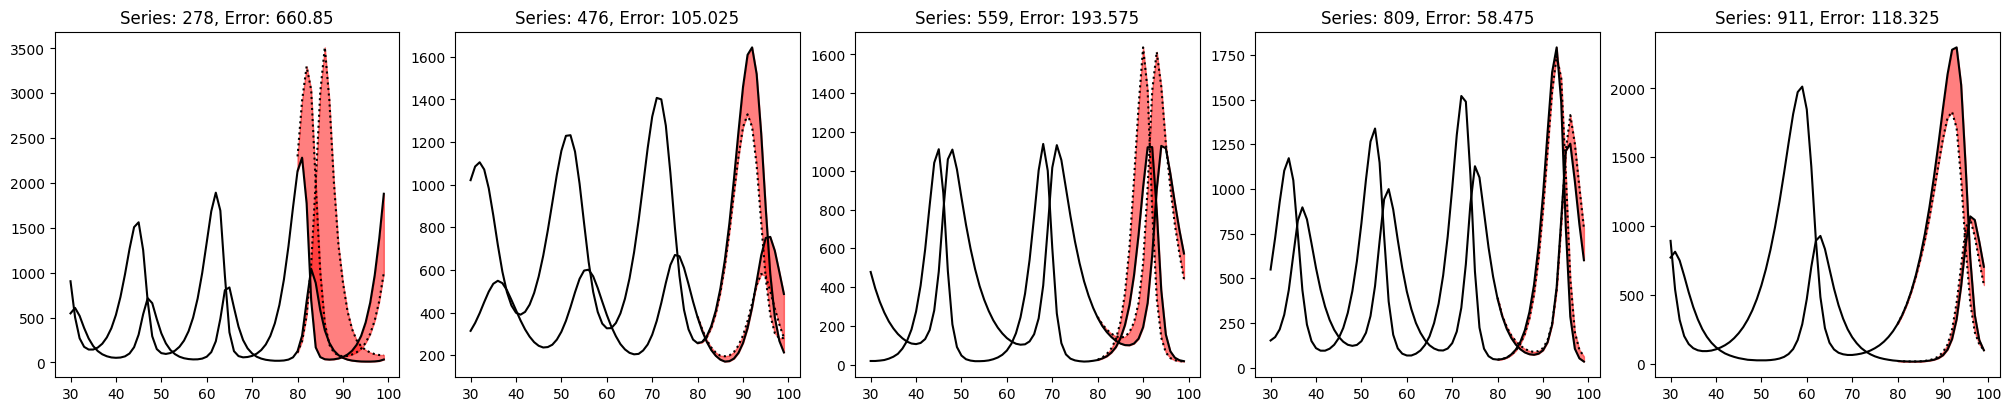


Experiment 3b - 7


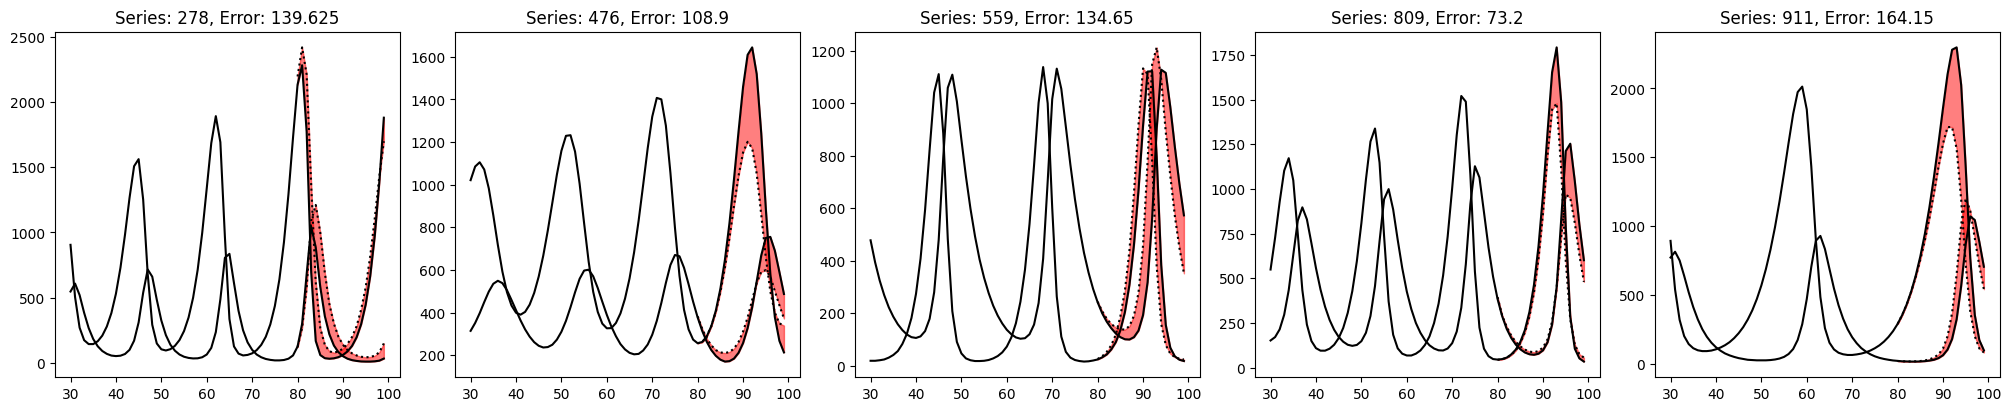


Experiment 3b - 2


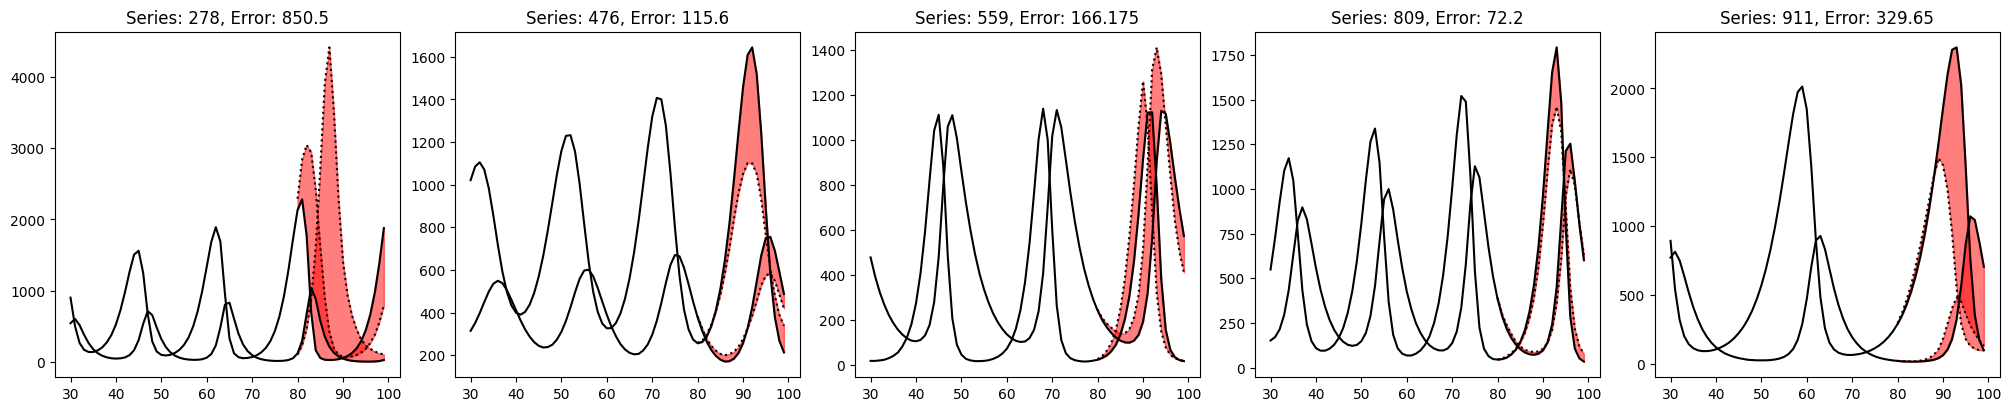


Experiment 3b - 6


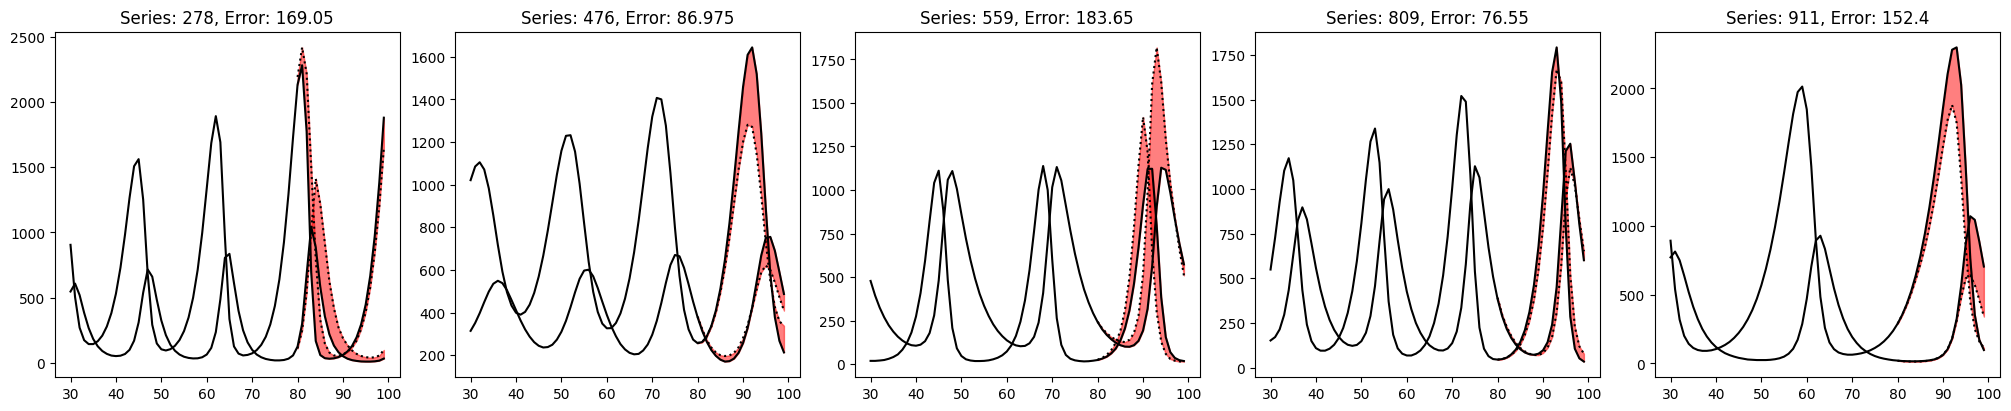


Experiment 3b - 8


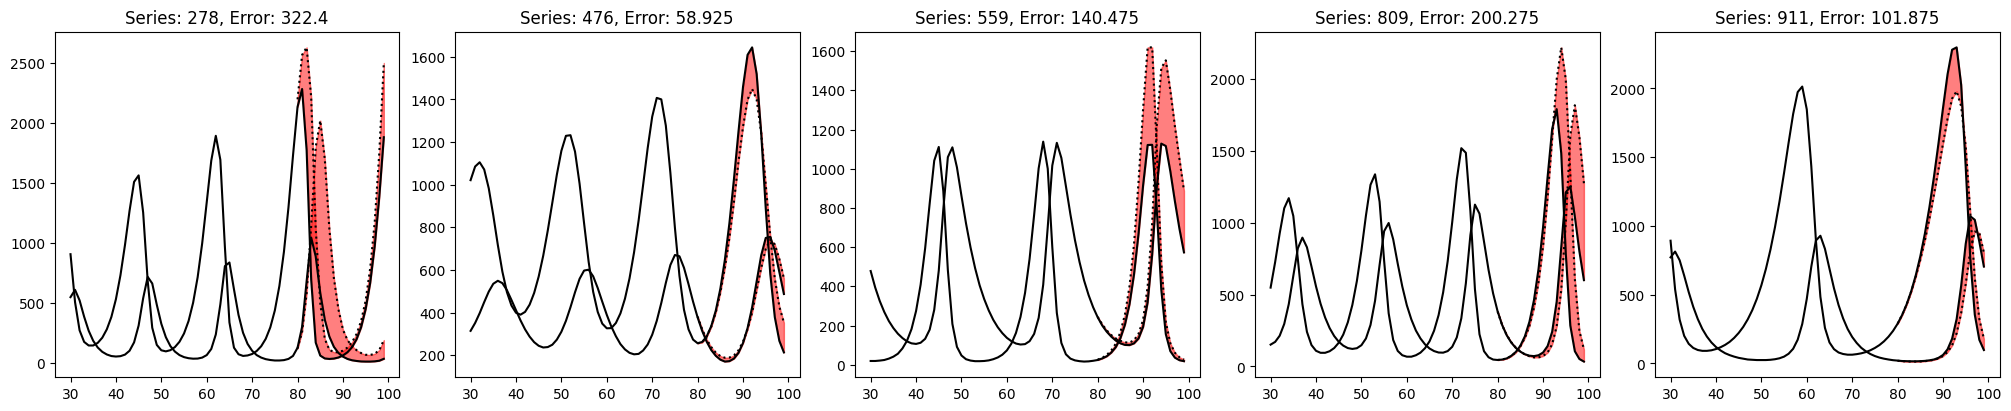


Experiment 3b - 0


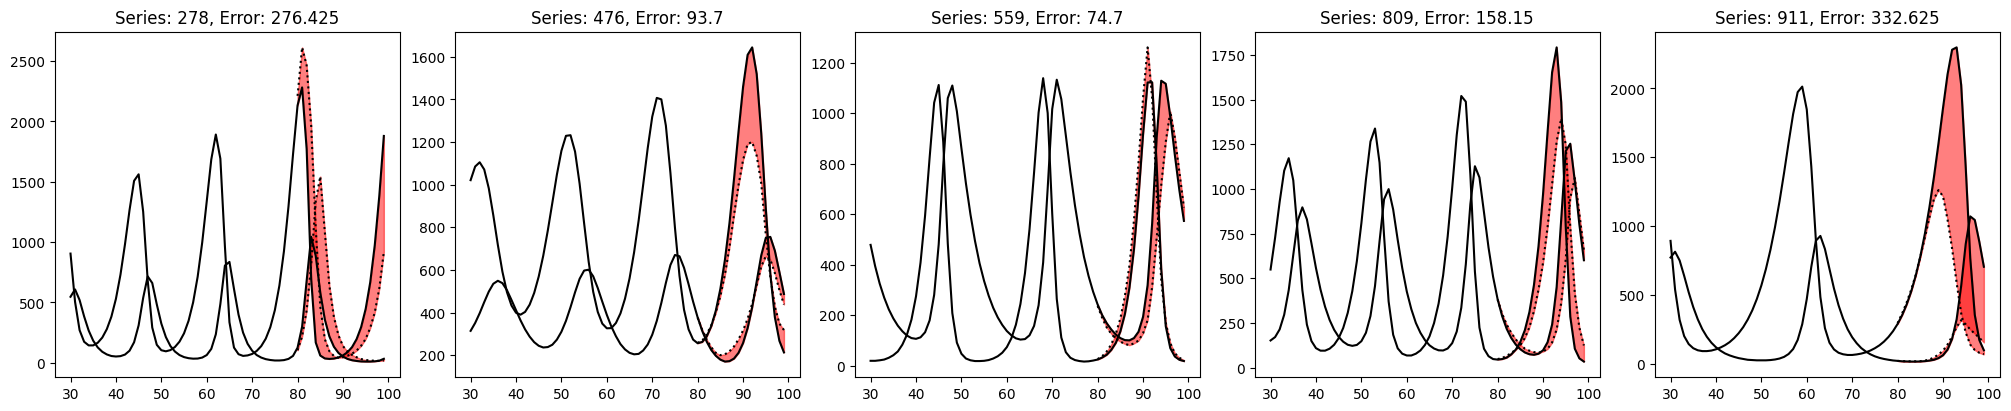

,series_id,MAE_4,max_dist_4,MAE_3,max_dist_3,MAE_1,max_dist_1,MAE_5,max_dist_5,MAE_7,max_dist_7,MAE_2,max_dist_2,MAE_6,max_dist_6,MAE_8,max_dist_8,MAE_0,max_dist_0
0,278,694.300,3352.0,630.225,3051.0,350.350,1722.0,660.850,3152.0,139.625,669.0,850.500,4191.0,169.050,815.0,322.400,1520.0,276.425,1270.0
1,476,83.600,403.0,102.450,483.0,101.400,388.0,105.025,429.0,108.900,473.0,115.600,544.0,86.975,378.0,58.925,210.0,93.700,444.0
2,559,273.200,1509.0,157.000,648.0,144.250,608.0,193.575,851.0,134.650,587.0,166.175,750.0,183.650,1047.0,140.475,498.0,74.700,414.0
3,809,105.125,572.0,47.475,296.0,176.125,701.0,58.475,301.0,73.200,375.0,72.200,332.0,76.550,310.0,200.275,1210.0,158.150,627.0
4,911,155.800,788.0,165.950,916.0,275.425,1500.0,118.325,696.0,164.150,835.0,329.650,1750.0,152.400,686.0,101.875,355.0,332.625,1712.0


In [2]:
from m2_cw.inference import visualise_forecasts
from pathlib import Path
import json
import re
import pandas as pd
from functools import reduce

figpath = Path.cwd() / "figs"
figpath.mkdir(parents=True, exist_ok=True)

ids_path = Path.cwd().parent.parent / "a/val_ids_subsubset.json"
with open(ids_path, "r") as f:
    val_ids_subsubset = json.load(f)

forecasts3b = [ file for file in Path.cwd().iterdir() if "forecast_eval_1" in str(file) ]
assert len(forecasts3b) == 9

# dir_contents2 = [ file for file in ids_path.parent.iterdir() if "forecast" in str(file) ]
# assert len(dir_contents2) == 1
# forecast2 = dir_contents2[0]

# print("Experiment 2")
# df2 = visualise_forecasts(forecast2, plots_per_row=10, eval_set="val", prefix=20)
# print("\n-----------------------\n")
dfs = []
for forecast in forecasts3b:
    match = re.search(r"forecast_eval_1_expt_(\d+)_", str(forecast))
    if match:
        expt_number = match.group(1)
    else:
        raise TypeError(f"No experiment id found in path {forecast}")
    print(f"\nExperiment 3b - {expt_number}")
    df = visualise_forecasts(forecast, plots_per_row=5, eval_set="val", prefix=50)
    df = df.rename(columns={"MAE": f"MAE_{expt_number}",
                            "max_dist": f"max_dist_{expt_number}"})
    dfs.append(df)

df = reduce(lambda left, right: pd.merge(left, right, on="series_id"), dfs)
df.head()

Average MAE:
 - Expt 0: 187.12
 - Expt 1: 209.51
 - Expt 2: 306.82
 - Expt 3: 220.62
 - Expt 4: 262.40
 - Expt 5: 227.25
 - Expt 6: 133.72
 - Expt 7: 124.10
 - Expt 8: 164.79


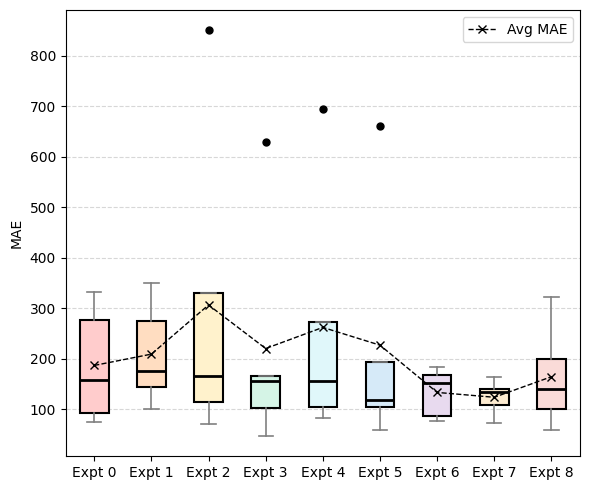

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from m2_cw.inference import boxplot_maes

labels = []
data = []
for i in range(9):
    target = f"MAE_{i}"
    data.append(df[target].to_numpy())
    labels.append(f"Expt {i}")

fig, ax = boxplot_maes(data, labels)

fig.savefig(figpath / "results1")
plt.show()

From weights and biases, I believe we should be looking at the latter half of the experiments, since they tend do improve as lora_rank increases and learning rate gets closer to 1e-4. Let's steal some time from the final model runtime and run some more evaluation on the remaining 20 ids from the validation subset.

We run the validation on 